In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import sys
import os
sys.path.append(os.path.abspath("..")) 
from utils.variables import bin_vars, ord_vars, cont_vars, cat_vars, numeric_vars

In [3]:
# Load the dataset
df = pd.read_csv('../data/student_preprocessed.csv')

# Display basic info about the dataset
df.info()

# Display first few rows and summary statistics
pd.set_option('display.max_columns', None)
display(df.head())  
display(df.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                649 non-null    int64
 1   Medu               649 non-null    int64
 2   Fedu               649 non-null    int64
 3   traveltime         649 non-null    int64
 4   studytime          649 non-null    int64
 5   failures           649 non-null    int64
 6   famrel             649 non-null    int64
 7   freetime           649 non-null    int64
 8   goout              649 non-null    int64
 9   Dalc               649 non-null    int64
 10  Walc               649 non-null    int64
 11  health             649 non-null    int64
 12  absences           649 non-null    int64
 13  G1                 649 non-null    int64
 14  G2                 649 non-null    int64
 15  G3                 649 non-null    int64
 16  school_binary      649 non-null    int64
 17  sex_binary      

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_binary,sex_binary,address_binary,famsize_binary,Pstatus_binary,schoolsup_binary,famsup_binary,paid_binary,activities_binary,nursery_binary,higher_binary,internet_binary,romantic_binary,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11,1,0,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12,1,0,1,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14,1,0,1,1,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13,1,0,1,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_binary,sex_binary,address_binary,famsize_binary,Pstatus_binary,schoolsup_binary,famsup_binary,paid_binary,activities_binary,nursery_binary,higher_binary,internet_binary,romantic_binary,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.00000,649.000000,649.000000,649.000000,649.000000,649.000000,649.00000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,0.651772,0.409861,0.696456,0.704160,0.876733,0.104777,0.613251,0.060092,0.485362,0.802773,0.893683,0.767334,0.368259,0.073960,0.397535,0.209553,0.11094,0.035439,0.565485,0.278891,0.055470,0.229584,0.11094,0.220339,0.701079,0.063174
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,0.476776,0.492187,0.460143,0.456771,0.328996,0.306502,0.487381,0.237841,0.500171,0.398212,0.308481,0.422857,0.482704,0.261908,0.489766,0.407304,0.31430,0.185030,0.496075,0.448799,0.229072,0.420890,0.31430,0.414795,0.458138,0.243464
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


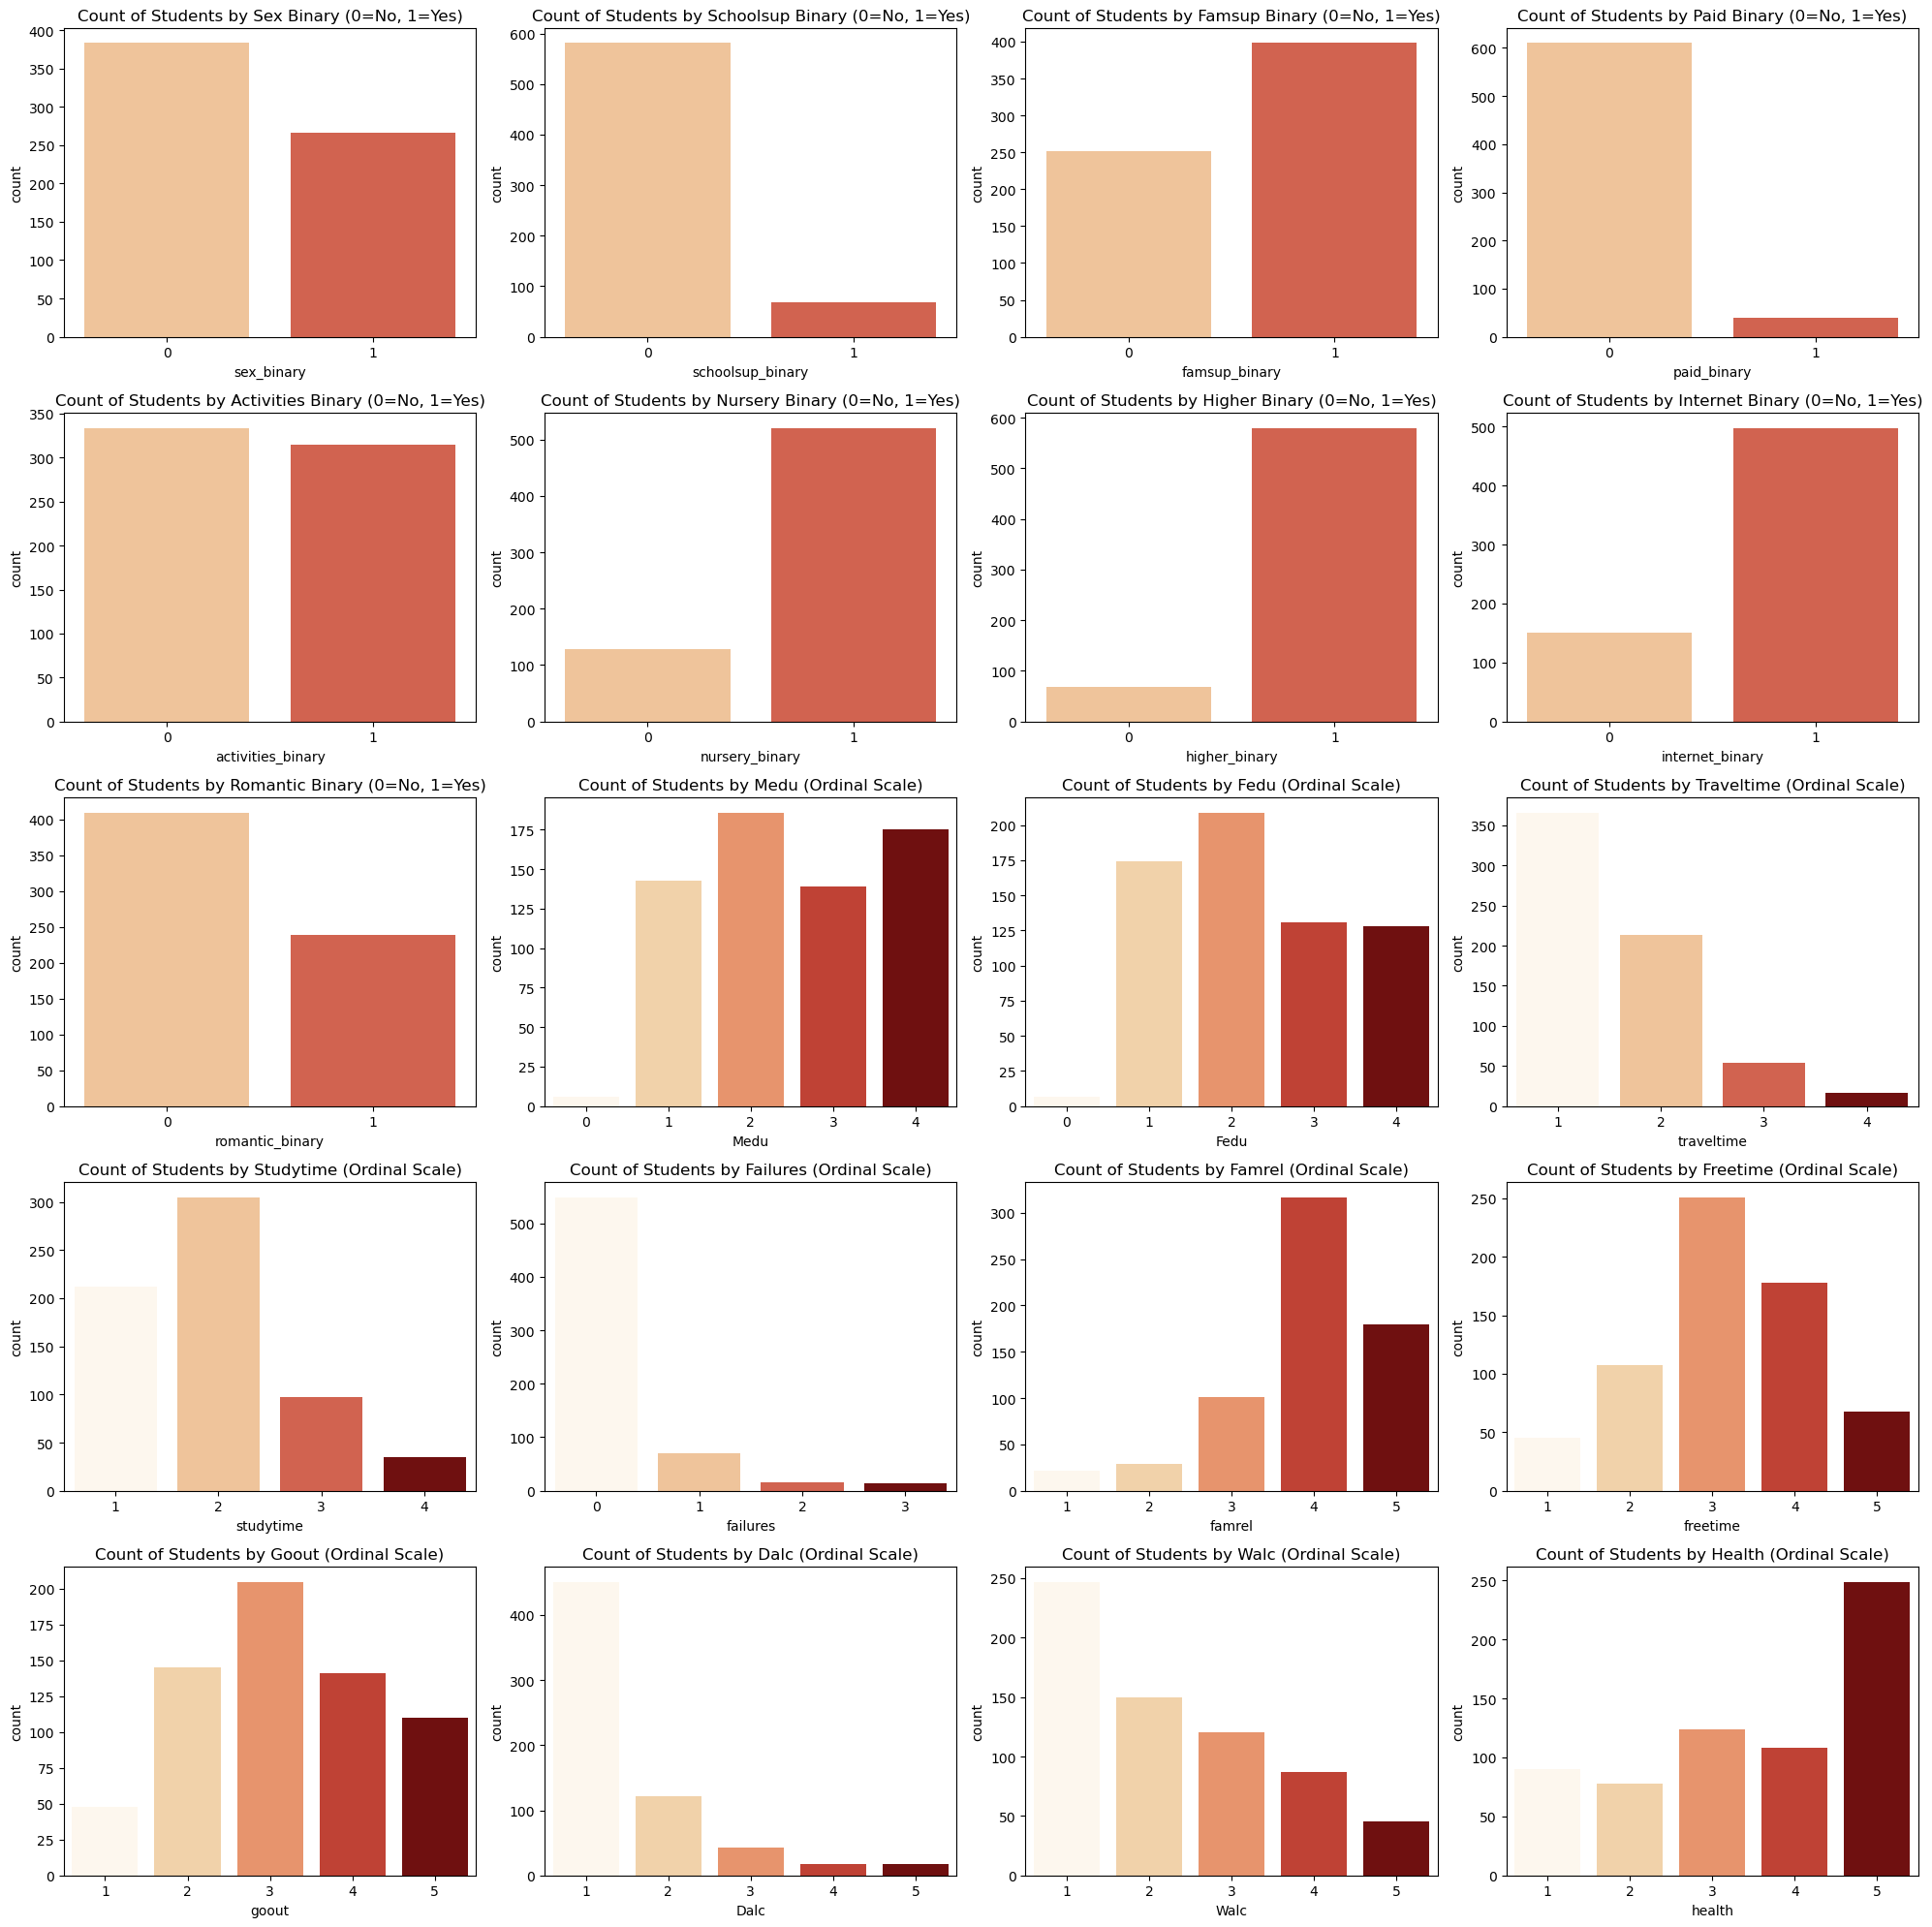

In [4]:
# 1. Count Plots for Categorical Variables 

# List of categorical columns and their titles
def make_title(var):
    if var in bin_vars:
        return f"Count of Students by {var.replace('_', ' ').title()} (0=No, 1=Yes)"
    elif var in ord_vars:
        return f"Count of Students by {var.replace('_', ' ').title()} (Ordinal Scale)"
    else:
        return f"Count of Students by {var.replace('_', ' ').title()}"
    
cat_var_tuples = [(var, make_title(var)) for var in cat_vars]

# Create grid of subplots
n_vars = len(cat_var_tuples)
n_cols = 4
n_rows = int(np.ceil(n_vars / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

# Plot each countplot
for i, (col, title) in enumerate(cat_var_tuples):
    sns.countplot(x=col, data=df, hue=col, palette="OrRd", ax=axes[i])
    axes[i].set_title(title)
    axes[i].get_legend().remove()  

plt.tight_layout()
plt.show()

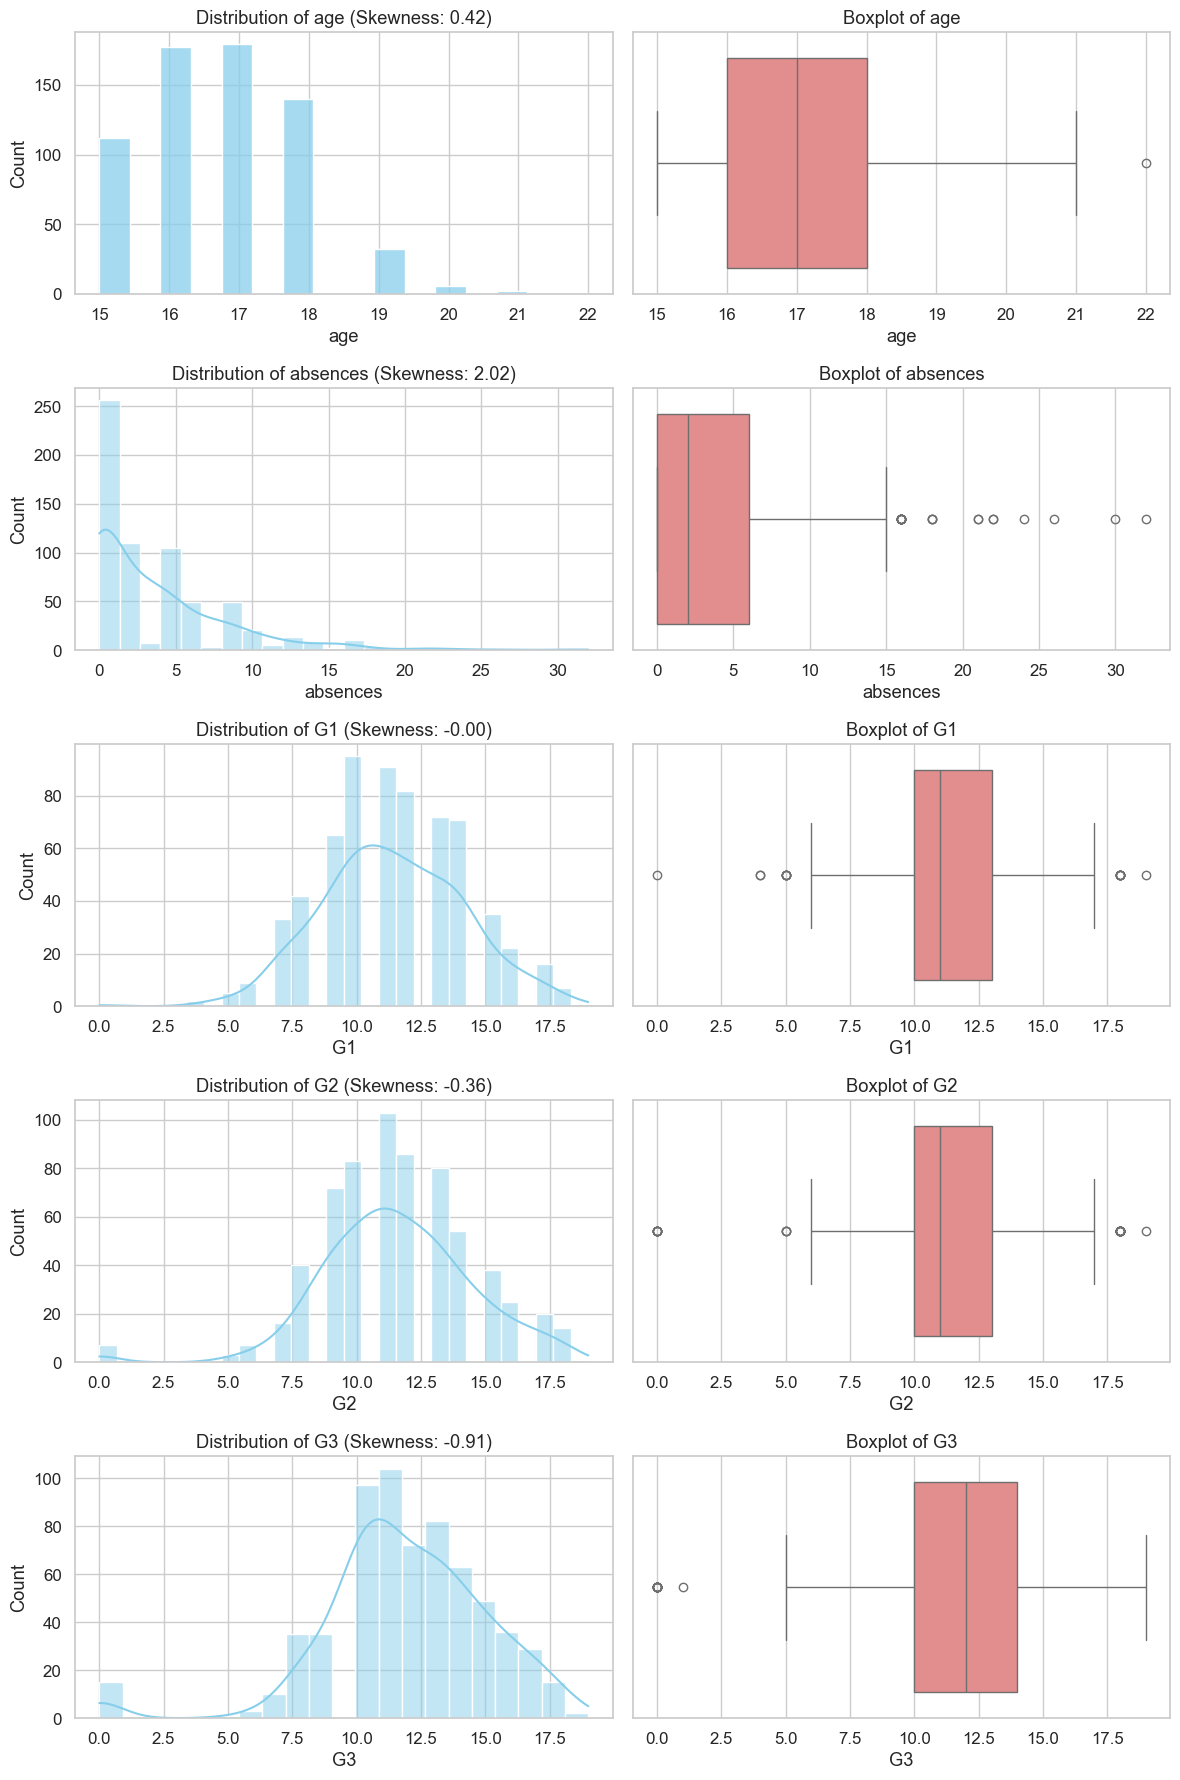

In [9]:
# 2. Distributions & Skewness of Continuous Variables

# Set style
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.1)

# Plot distributions and boxplots for continuous variables
fig, axes = plt.subplots(len(cont_vars), 2, figsize=(12, 18))
for i, var in enumerate(cont_vars):
    # Determine whether to show KDE
    kde_flag = False if var == 'age' else True

    # Histogram with KDE
    sns.histplot(df[var], kde=kde_flag, ax=axes[i, 0], color="skyblue")
    skewness = df[var].skew()
    axes[i, 0].set_title(f"Distribution of {var} (Skewness: {skewness:.2f})")
    
    # Boxplot
    sns.boxplot(x=df[var], ax=axes[i, 1], color="lightcoral")
    axes[i, 1].set_title(f"Boxplot of {var}")

plt.tight_layout()
plt.show()


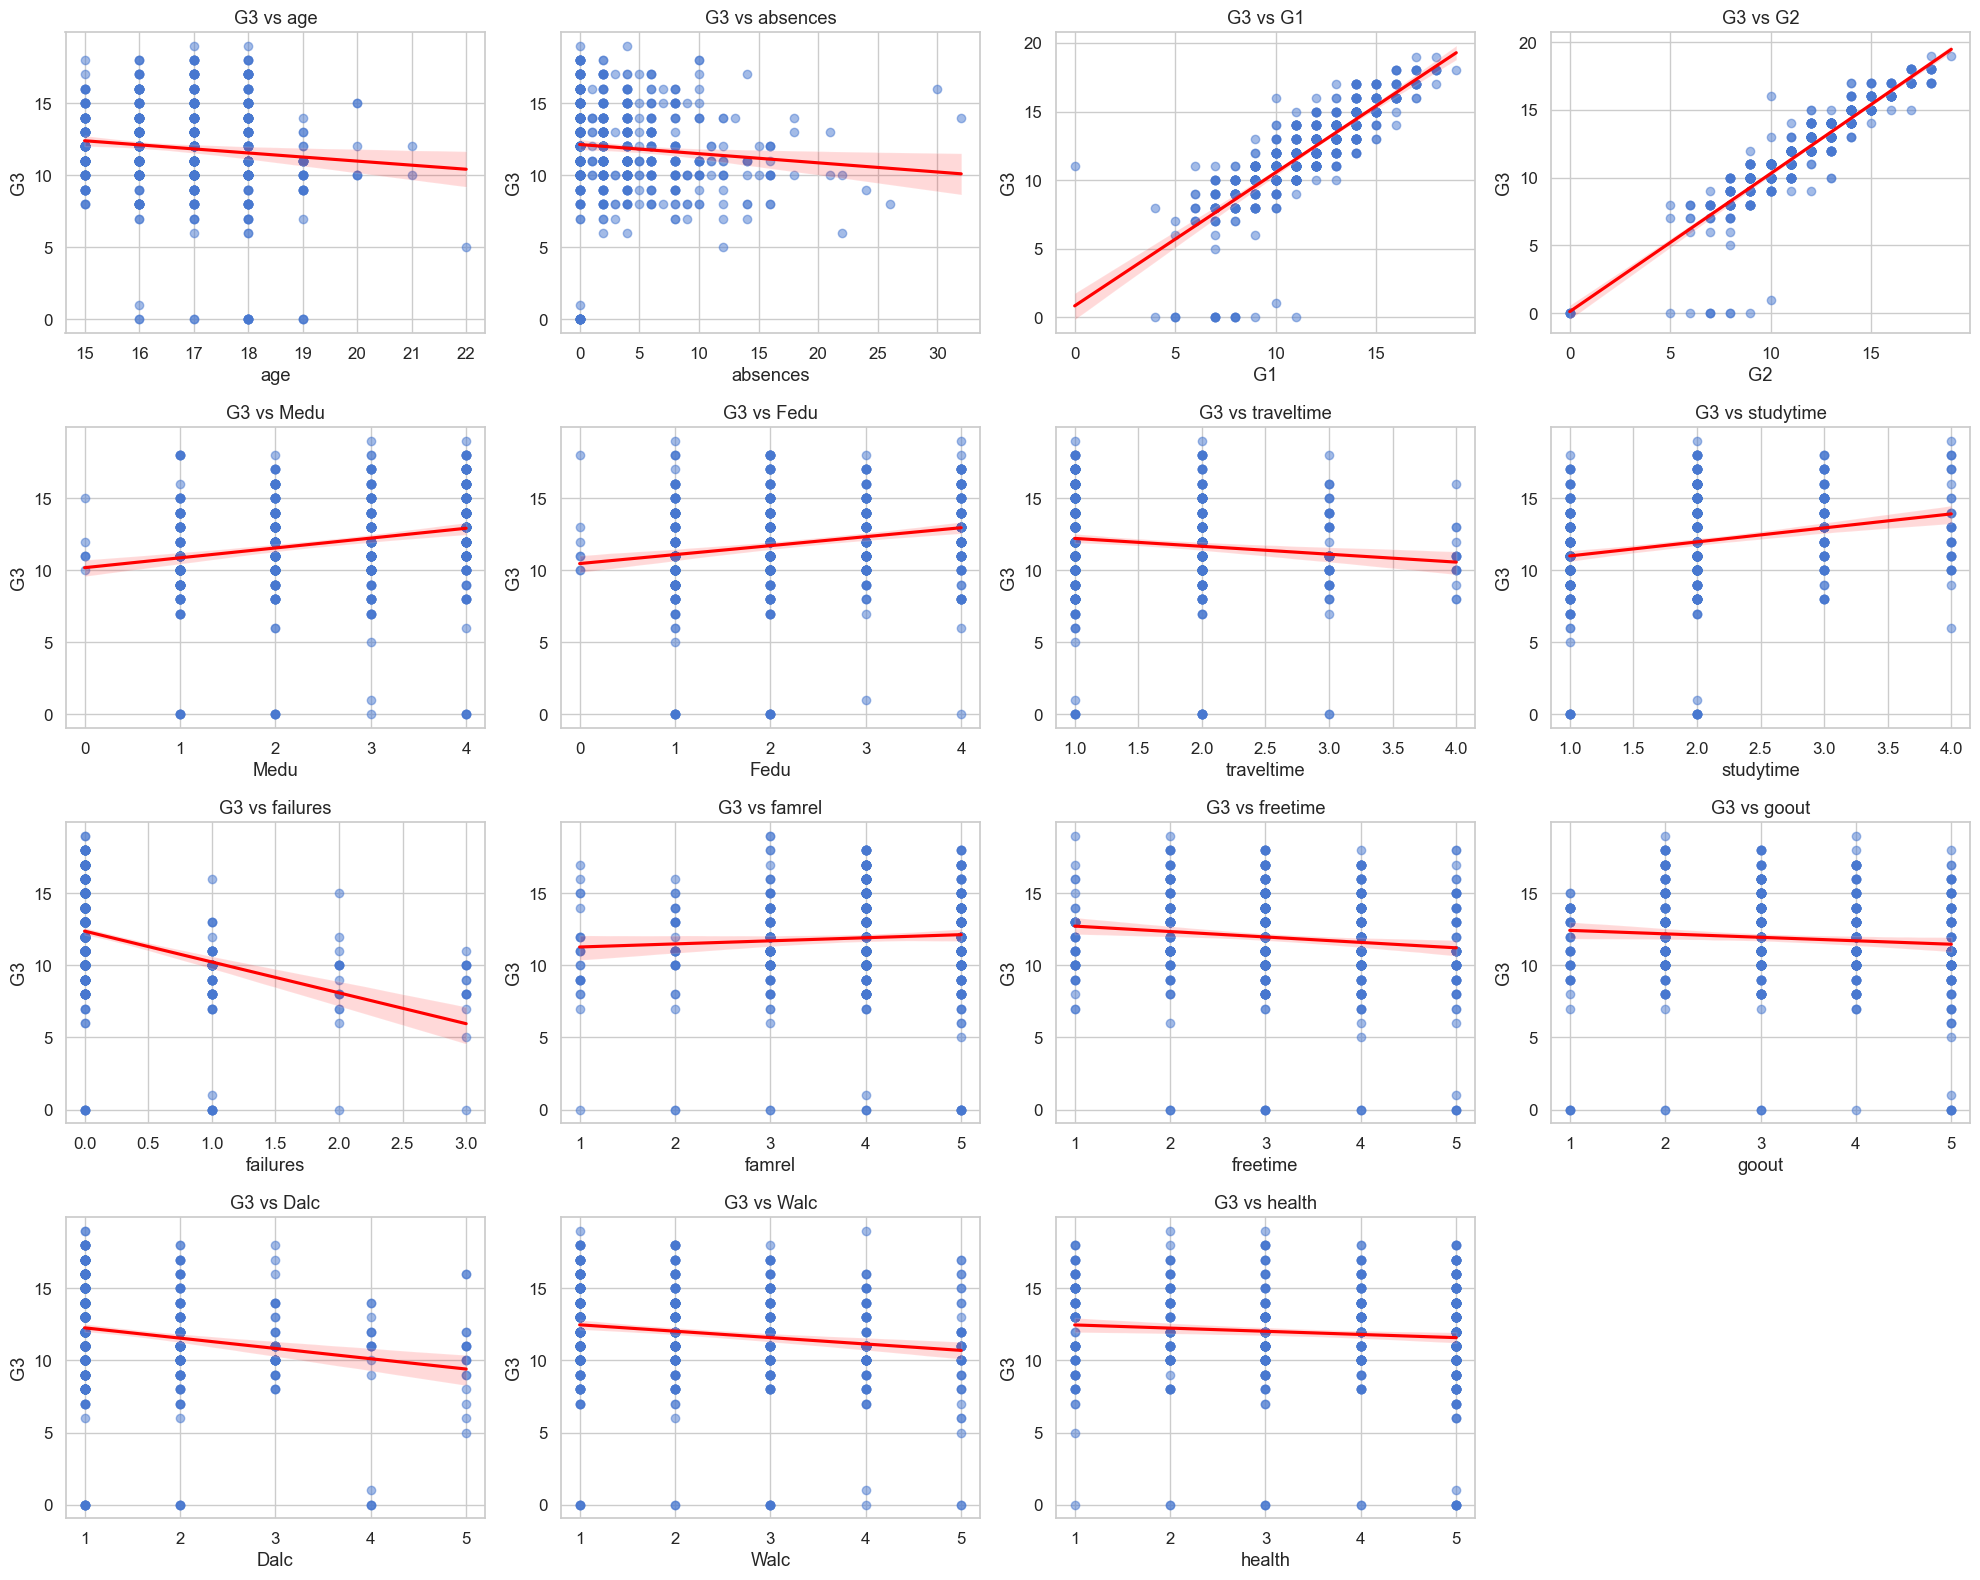

In [6]:
# 3. Scatter Plots & Regression vs G3 for Numeric Variables

# Remove 'G3' itself to avoid plotting vs itself
numeric_vars = [var for var in numeric_vars if var != 'G3']

# Determine grid size
n_vars = len(numeric_vars)
n_cols = 4
n_rows = int(np.ceil(n_vars / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

# Loop through variables and plot scatter + regression vs G3
for i, col in enumerate(numeric_vars):
    sns.regplot(
        x=col,
        y='G3',
        data=df,
        scatter_kws={'alpha':0.5},
        line_kws={'color':'red'},
        ax=axes[i]
    )
    axes[i].set_title(f"G3 vs {col}")

# Remove any unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


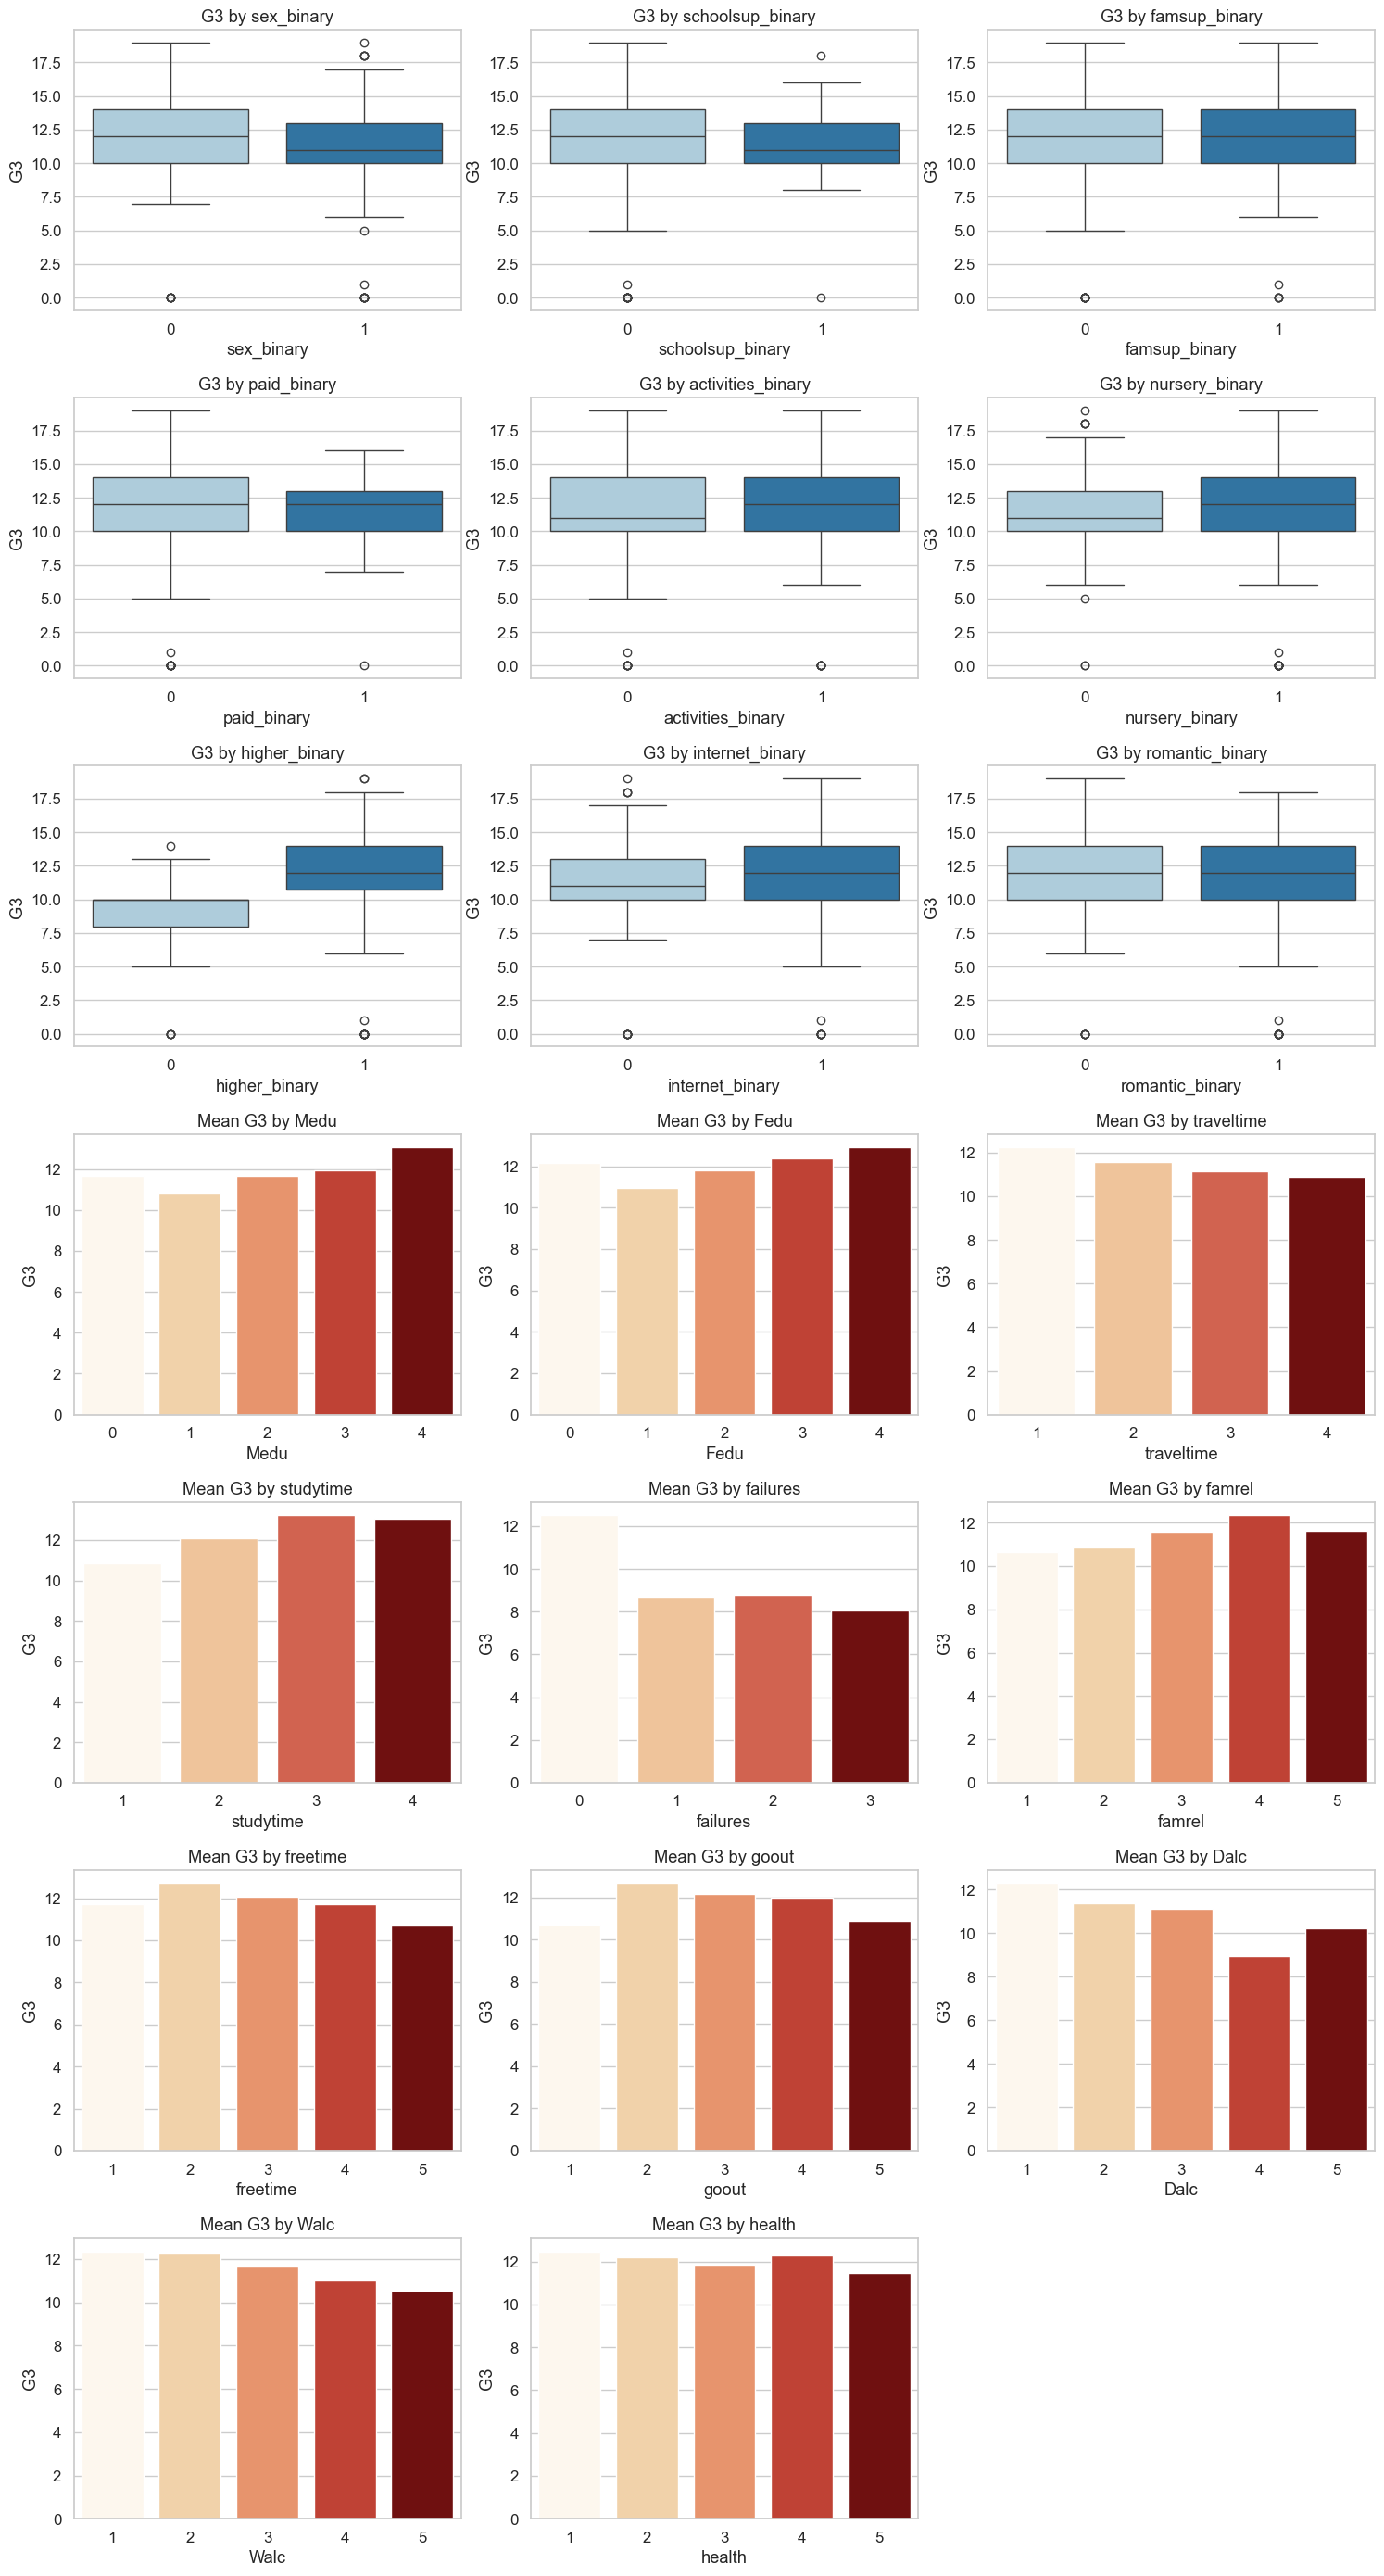

In [7]:
# 4. Group Comparisons (Boxplots & Bar charts)

# Determine grid size
n_vars = len(cat_vars)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

# Loop through variables
for i, var in enumerate(cat_vars):
    ax = axes[i]
    
    # Binary variables → boxplot
    if var in bin_vars:
        sns.boxplot(x=var, y='G3', data=df, ax=ax, palette='Paired', hue=var)
        ax.set_title(f"G3 by {var}")
        ax.get_legend().remove()
    
    # Ordinal variables → barplot of mean G3
    elif var in ord_vars:
        sns.barplot(x=var, y='G3', data=df, errorbar=None, ax=ax, palette='OrRd', hue=var)
        ax.set_title(f"Mean G3 by {var}")
        ax.get_legend().remove()

# Remove unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/var/folders/6f/2xptkgqx43s6r2pql2v71lp80000gn/T/ipykernel_58526/3745693391.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette="coolwarm")


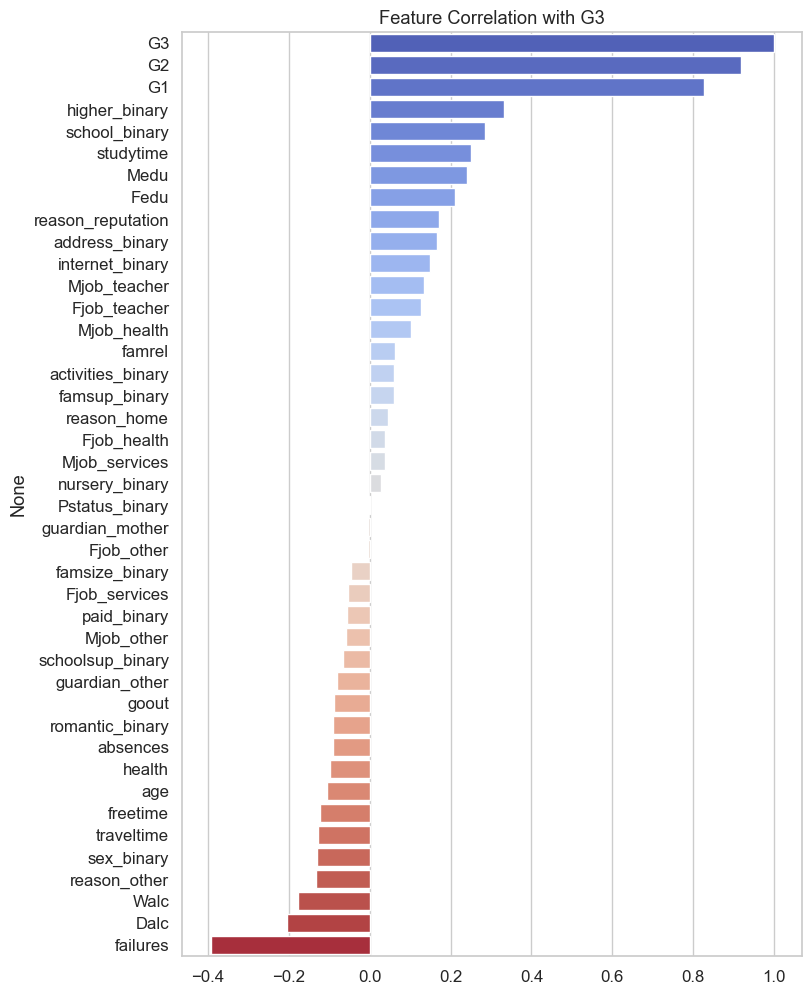

In [8]:
# 5. Correlation Heatmap

corr_target = df.corr()['G3'].sort_values(ascending=False)
plt.figure(figsize=(8,12))
sns.barplot(x=corr_target.values, y=corr_target.index, palette="coolwarm")
plt.title("Feature Correlation with G3")
plt.show()